In [ ]:
import matplotlib.pylab as pl
%matplotlib inline

import cPickle as pickle

## experiment settings
### network structure
(((2, 2), 64, (2, 2)),) \* 2 + (((2, 2), 32, (1, 1), (1, 1)),) \* convolution_layers<br>
format: (kernel_shape, kernel_number, [stride, [pad]])<br>
convolution_layers ranges from 1 to 10
### hyperparameters
batch size: 128<br>
epochs: 100 (ReLU, BN + ReLU); 60 (DReLU, NDReLU, BN + DReLU)<br>
initialization: MSRA PReLU (lower = 0, upper = 1) 
learning rate: 0.05<br>
learning rate decay: none<br>
optimizer: SGD (C++)<br>
regularization: none<br>
test data: 10000 images<br>
training data: 40000 images<br>
validation data: 10000 images<br>

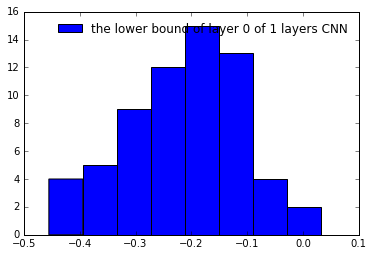

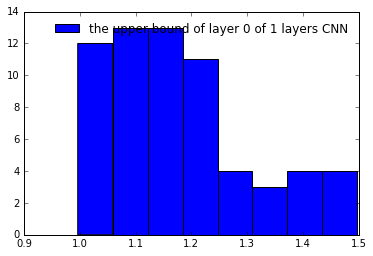

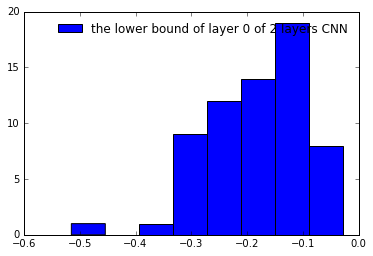

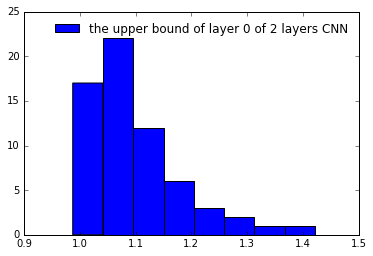

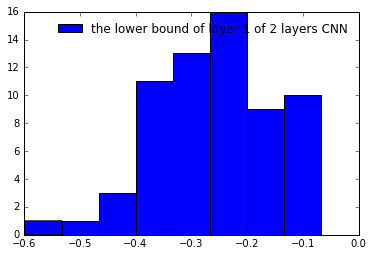

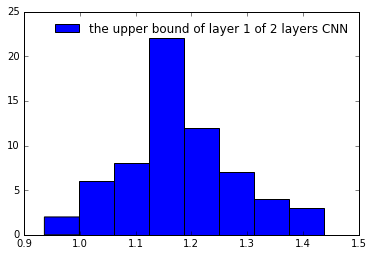

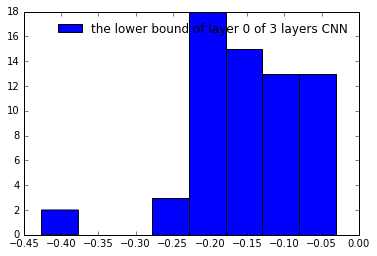

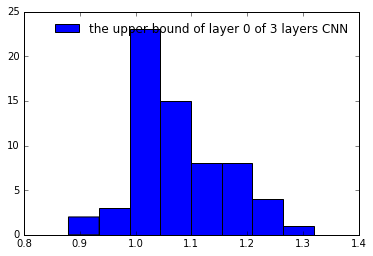

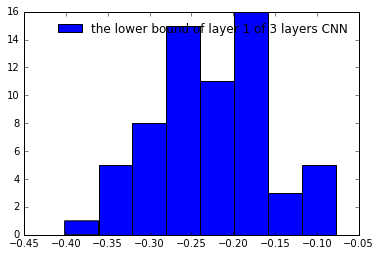

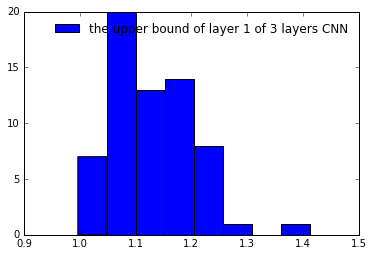

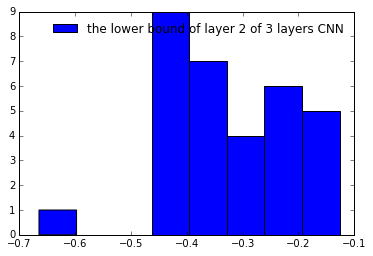

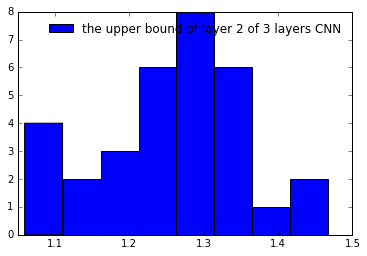

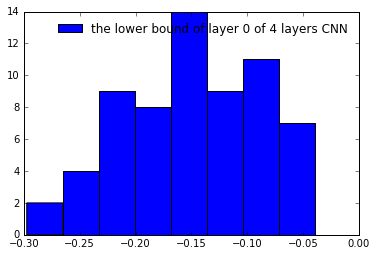

In [ ]:
bins = 8
activations = ('DReLU', 'NDReLU', 'BNDReLU')
for activation in activations:
    for depth in range(10):
        shape = (1024,) * depth + (10,)
        path = '../../models/CIFAR-10-%d-layer-no-pooling-CNN-%s-parameters' % (depth + 3, activation)
        parameters, _ = pickle.load(open(path, 'rb'))
        for layer in range(depth):
            lower = parameters['%s%d_lower' % (activation, layer)].asnumpy().flatten()
            upper = parameters['%s%d_upper' % (activation, layer)].asnumpy().flatten()
            pl.hist(
                lower,
                bins=bins,
                normed=False,
                label='the lower bound of layer %d of %d layers CNN' % (layer, depth)
            )
            pl.legend(framealpha=0)
            pl.show()
            pl.hist(
                upper,
                bins=bins,
                normed=False,
                label='the upper bound of layer %d of %d layers CNN' % (layer, depth)
            )
            pl.legend(framealpha=0)
            pl.show()